<a href="https://colab.research.google.com/github/jiayizhang19/Deep_Learning/blob/main/Decision_Tree_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Implementation on Wine Quality


### Data Understanding
1. Include a link to and basic description of the data (what the features are).
2. Write your own brief description of what the classification task is and why a decision tree is a reasonable model to try for this data.
3. Include one summary visualization of the data.

In [ ]:
# !pip install graphviz
# !pip install pydotplus

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the tree
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Data/winequality-red.csv'
data = pd.read_csv(data_path, sep=';')
df = pd.DataFrame(data)
print(f'Shape of data is {df.shape}.')
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
# Change numeric values into categorical target
scores = [0, 4, 6, 10]
labels = ['Bad', 'Good', 'Excellent']
y = pd.cut(y, bins = scores, labels = labels, include_lowest = True, ordered=True)
print('Feature Columns:', X.columns.tolist())
print('Target Column: ', y.name)
print('Number per target class: \n', y.value_counts())

Shape of data is (1599, 12).
Feature Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target Column:  quality
Number per target class: 
 quality
Good         1319
Excellent     217
Bad            63
Name: count, dtype: int64


In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Data/card_transdata.csv'
data = pd.read_csv(data_path, sep=',')
df = pd.DataFrame(data)
print(f'Shape of data is {df.shape}.')
df.columns.to_list()
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
y = y.map({0: 'not fraud', 1: 'fraud'})

Shape of data is (1000000, 8).


### Basic Decision Tree Implmentation
1. Fit a decision tree with the default parameters on 50% of the data
2. Test it on 50% held out data and generate a classification report
3. Inspect the model by visualizing and interpreting the results
4. Does this model make sense? --
### Intepretation of the result
Without giving any parameters to the classifier, it has a overall accurancy of 79%, which seems pretty good. However, if looks into details of the classification report, the value of precision, recall and f1-score indicate that the model performs extremely poorly in predicting "Bad" class, and performs moderately in "Excellent" class. It only performs excellent in predicting "Good" class. The result indicates that it is an imbalanced datasets, with "Good" class dominates.
From the confusion matrix heat map, we can see that most of the "Bad" class data was incorrectly predicted to the "Good" class, and nearly half of the "Excellent" class data was incorrectly predicted as "Good",


5. Are there any leaves that are very small?
6. Is this an interpretable number of levels?
7. Repeat with the entropy criterion. Does using the entropy criterion make a big difference or small difference in the overall classifier?
 - (See the documentation for the sklearn DecisionTreeClassifier. One of the parameters is called criterion)

Accurancy:  0.78875
Classification Report:
               precision    recall  f1-score   support

         Bad       0.15      0.19      0.17        31
        Good       0.89      0.86      0.87       657
   Excellent       0.49      0.54      0.52       112

    accuracy                           0.79       800
   macro avg       0.51      0.53      0.52       800
weighted avg       0.80      0.79      0.80       800



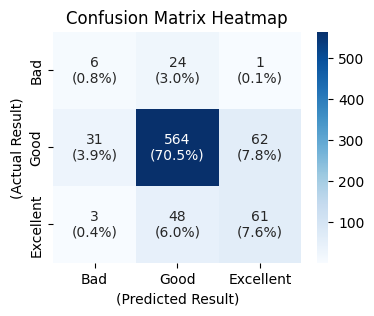

In [ ]:
# Building and evaluating the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42) # ensure to use the random_state, otherwise predict result changes overtime
dt_clf = dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print('Accurancy: ',metrics.accuracy_score(y_test, y_pred))
# Plot confusion matrix heatmap
conf_mtrx = metrics.confusion_matrix(y_test, y_pred, labels=labels)
sum = conf_mtrx.sum()
annot = []
for i in range(conf_mtrx.shape[0]):
  row = []
  for j in range(conf_mtrx.shape[1]):
    count = conf_mtrx[i][j]
    percent = count / sum * 100
    row.append(f"{count}\n({percent:.1f}%)")
  annot.append(row)
annot = np.array(annot)
plt.figure(figsize=(4,3))
sns.heatmap(
    conf_mtrx,
    annot=annot,
    fmt='s',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels,
)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('(Predicted Result)')
plt.ylabel('(Actual Result)')
plt.show()

print('Classification Report:\n',metrics.classification_report(y_test, y_pred, labels = labels))


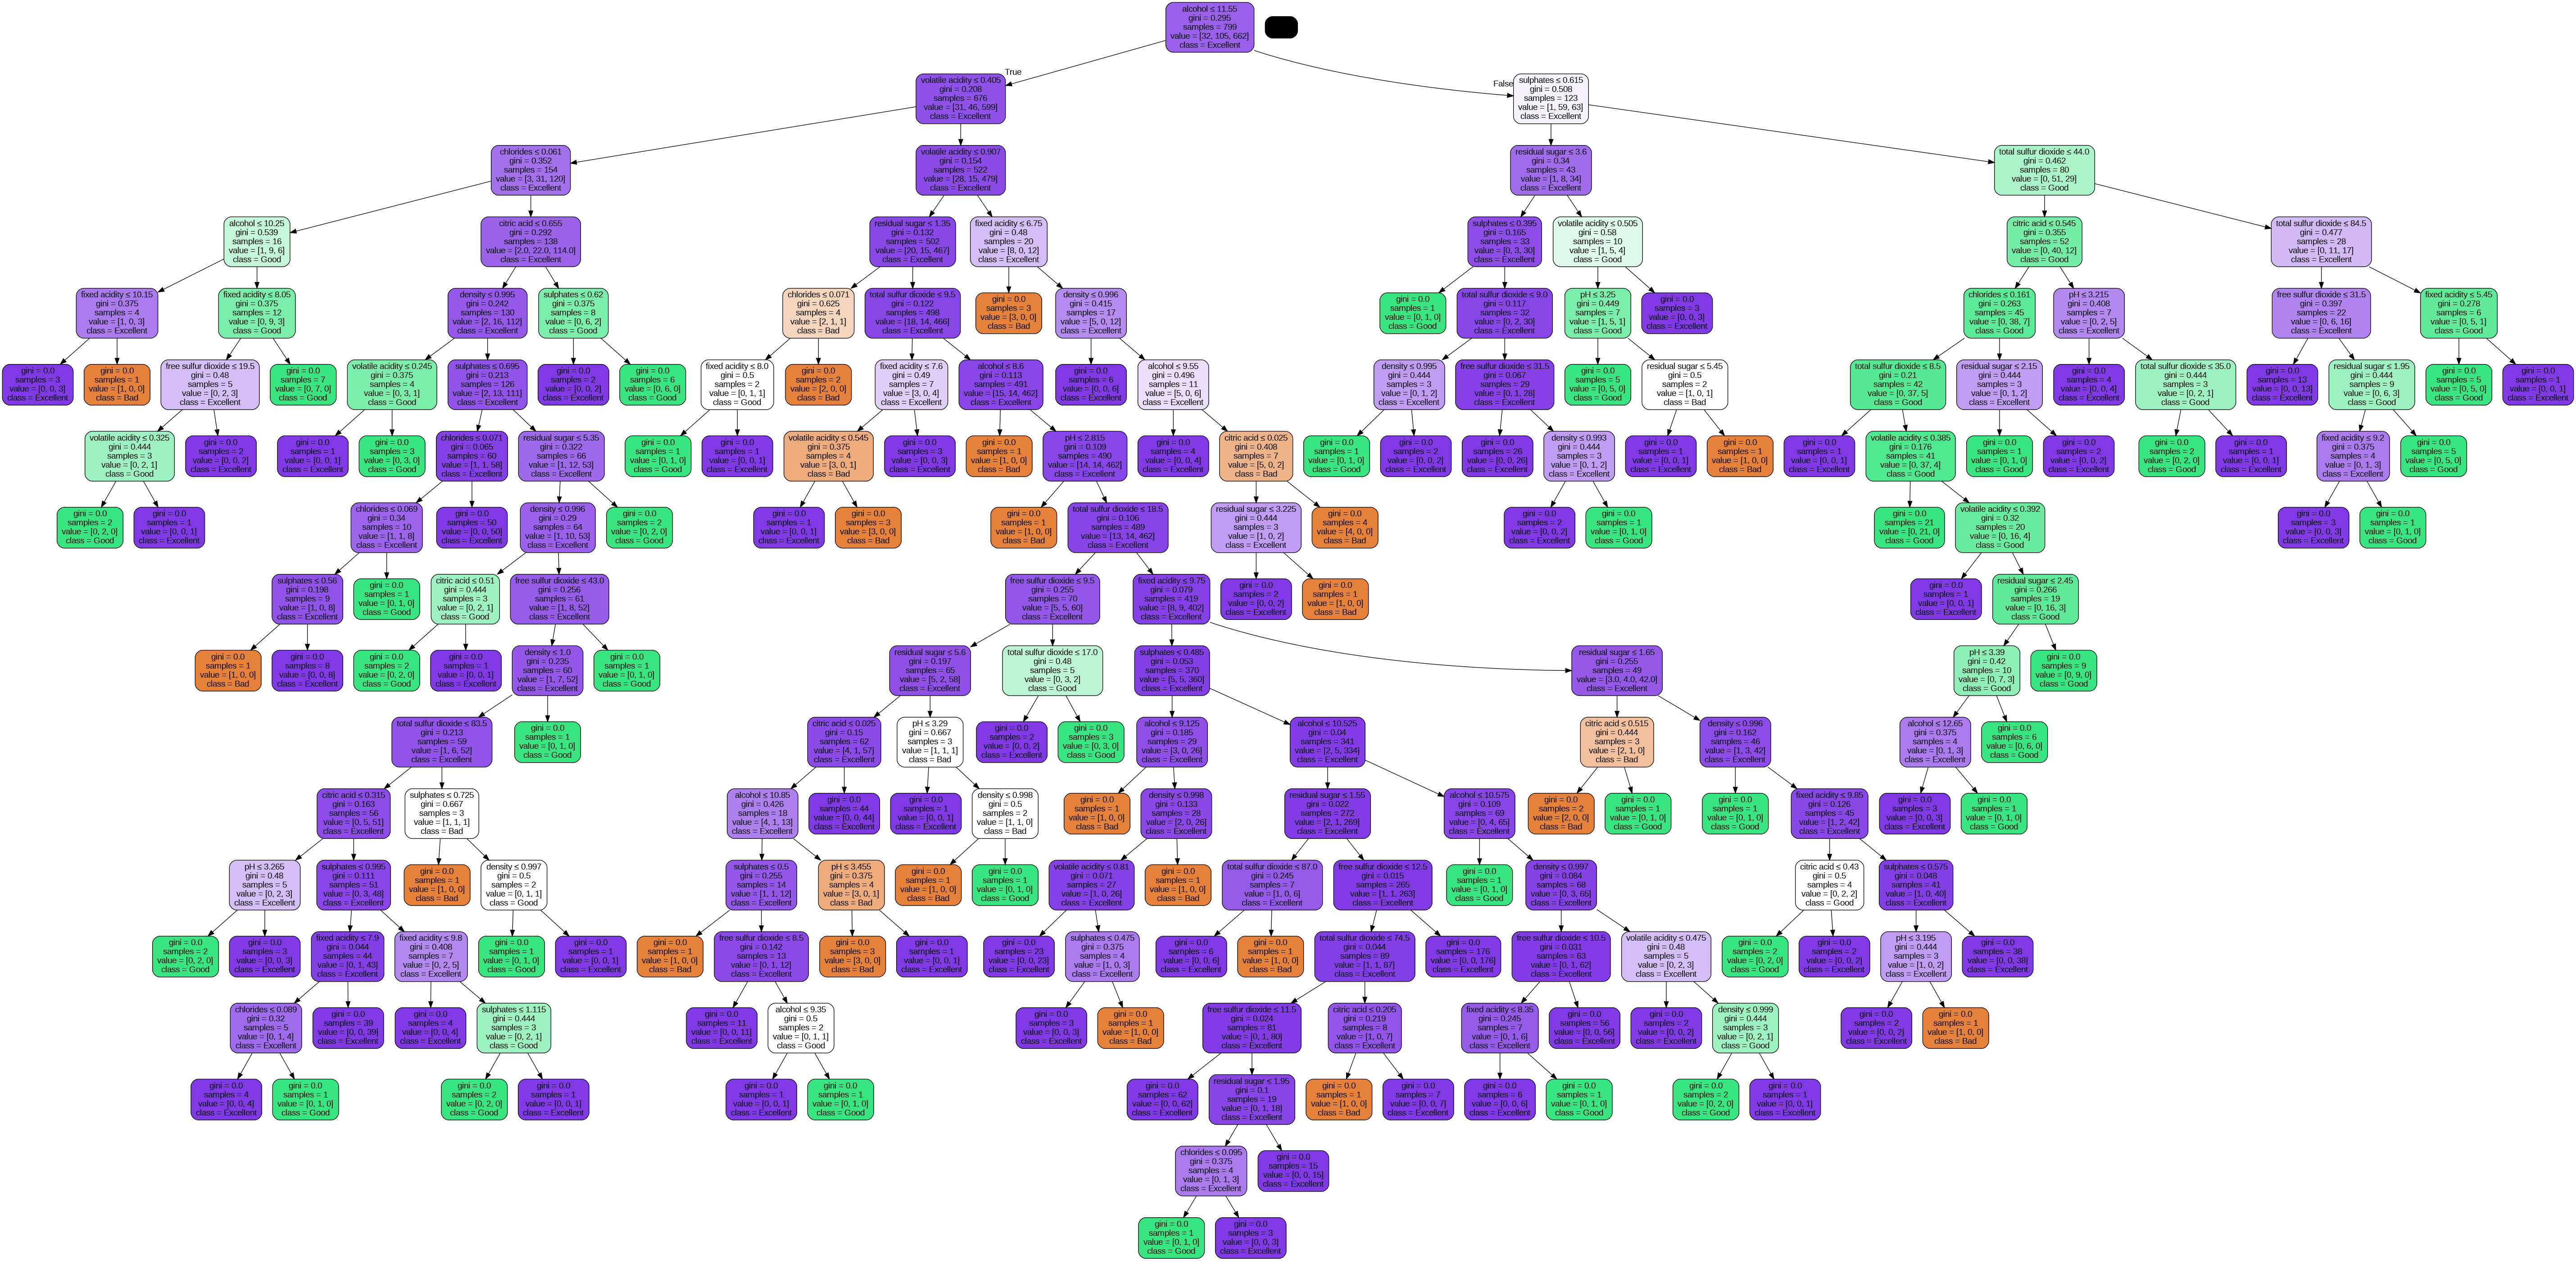

In [ ]:
# Visualizing the model
dot_data = StringIO()
export_graphviz(dt_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns.tolist(),
                # class_names=dt_clf.classes_, # it will determine the class order defaults to alphabetical
                class_names=labels) # pass the desired order
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('red-wine.png')
Image(graph.create_png())

### Parameter Experiments
Experiment to see how max_depth, min_values_split, or min_values_leaf impacts the model
1. Choose one of these and say explain why and how you hypothesise it will impact the performance.
2. Use the model you fit above and EDA (Exploratory Data Analysis) to choose minimum and maximum values for your parameter. Choose a total of 3 values for the parameter, explaining your choice.
3. Retrain the model for each value of the parameter.
4. Test and use at least 3 metrics to describe the performance, compiling your results into a DataFrame.
5. Plot and interpret your results.